In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
df = pd.read_csv('group_CD_camera3_trim.csv')


In [3]:
included_features = ['face_id','gaze_angle_x']

vectorList = np.zeros((len(df),2))
for index, row in df.iterrows():
    if(row[' gaze_angle_x'] or row[' gaze_angle_y']):
        vectorList[index] = [row[' gaze_angle_x'], row[' gaze_angle_y']]
        


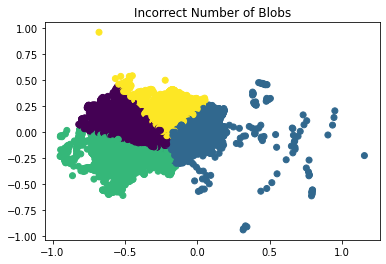

In [12]:
#print(vectorList)

kmeans = KMeans(n_clusters=4, random_state=0).fit_predict(vectorList)


plt.scatter(vectorList[:, 0], vectorList[:, 1], c=kmeans)
plt.title("Incorrect Number of Blobs")
plt.savefig('class.png')


In [13]:
kmeans2 = KMeans(n_clusters=4, random_state=0).fit(vectorList)


In [14]:
import cv2

cap = cv2.VideoCapture('/media/sebo-hri-lab/DATA/Trimmed_Videos/group_CD_camera3_trim.mp4')
i = 0
colors = [(255,0,0),(0,255,0),(255,0,255),(255,255,0),(0,0,255),(255,100,0)]
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter('classificationExample.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
while True:
    _, frame = cap.read()
    row = df.iloc[i]
    vec = [[row[' gaze_angle_x'],row[' gaze_angle_y']]]
    clus = kmeans2.predict(vec)[0]
    cv2.rectangle(frame,(100,100),(150,150),colors[clus],2)
    out.write(frame)
    cv2.imshow('my image', frame)
    i+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()


NameError: name 'frame_width' is not defined